In [1]:
!pip install scikit-learn


In [3]:
data = pd.read_csv('/content/weather_data.csv', sep=';')

In [10]:
data.head(5)

,Day,Temperature
0,Tuesday,24
1,Wednesday,23
2,Thursday,25
3,Friday,26
4,Saturday,27


Mean Squared Error: 1.87


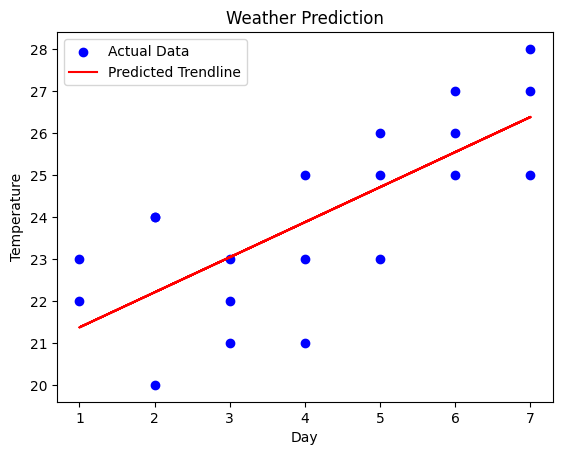

Predicted Temperature for Day 8: 27.21°C


In [5]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Step 1: Load the dataset (make sure to upload weather_data.csv to Colab)
data = pd.read_csv('/content/weather_data.csv', sep=';')  # Adjust the path if needed

# Step 2: Convert 'Day' to numeric values (mapping days of the week to numbers)
day_mapping = {
    'Monday': 1,
    'Tuesday': 2,
    'Wednesday': 3,
    'Thursday': 4,
    'Friday': 5,
    'Saturday': 6,
    'Sunday': 7
}

# Apply the mapping to the 'Day' column
data['Day'] = data['Day'].map(day_mapping)

# Step 3: Prepare the data
X = data[['Day']]  # Independent variable (Day)
y = data['Temperature']  # Dependent variable (Temperature)

# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 6: Make predictions
y_pred = model.predict(X_test)

# Step 7: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

# Step 8: Visualize the results
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, model.predict(X), color='red', label='Predicted Trendline')
plt.xlabel('Day')
plt.ylabel('Temperature')
plt.title('Weather Prediction')
plt.legend()
plt.show()

# Step 9: Predict tomorrow's temperature
next_day = pd.DataFrame([[max(data['Day']) + 1]], columns=['Day'])  # Creating a DataFrame with the correct column name
predicted_temp = model.predict(next_day)
print(f"Predicted Temperature for Day {next_day.iloc[0, 0]}: {predicted_temp[0]:.2f}°C")
